#### Step 1: Generate a dummy data set

In [96]:
import numpy as np
import pandas as pd
#X = np.random.randint(10,50,100).reshape(20,5) 
X = [[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]]

X=pd.DataFrame(X)
print(X)

     0    1
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9


Text(0, 0.5, 'y')

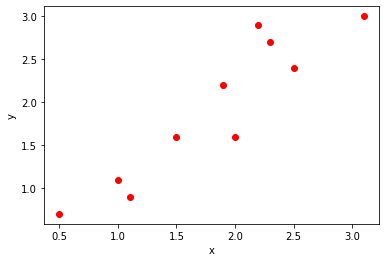

In [77]:
plt.scatter(X[0],X[1], color = "r")
plt.xlabel('x')
plt.ylabel('y')


0    0.69
1   -1.31
2    0.39
3    0.09
4    1.29
5    0.49
6    0.19
7   -0.81
8   -0.31
9   -0.71
Name: 0, dtype: float64
0    0.49
1   -1.21
2    0.99
3    0.29
4    1.09
5    0.79
6   -0.31
7   -0.81
8   -0.31
9   -1.01
Name: 1, dtype: float64


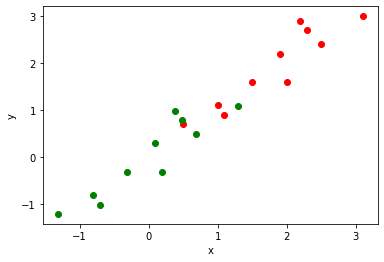

In [92]:
# calculating mean and finding the deviation of the data from mean
X_meaned = X - np.mean(X , axis = 0)
print(X_meaned[0])
X_meaned=pd.DataFrame(X_meaned)
plt.scatter(X[0],X[1], color = "r")
plt.scatter(X_meaned[0],X_meaned[1], color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

####  Step 2 : Calculate the Covariance Matrix 
##### it outputs a 5x5 matrix

In [80]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


#### Compute the Eigen values and Eigen vectors


In [81]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print(eigen_values)
print(eigen_vectors)

[0.0490834  1.28402771]
[[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]


#### Sort Eigenvalues in descending order

In [112]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
    
sorted_eigenvalue = eigen_values[sorted_index]
print (sorted_eigenvalue)
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print (sorted_eigenvectors)
sorted_eigenvectors=pd.DataFrame(sorted_eigenvectors)
print (sorted_eigenvectors)

[1 0]
[1.28402771 0.0490834 ]
[[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]
          0         1
0  0.677873 -0.735179
1  0.735179  0.677873


#### Step 5: Select a subset from the rearranged Eigenvalue matrix
#### select the first n eigenvectors, n is desired dimension (select n =2)

In [108]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset)

[[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]


#### Step 6. Transform the data

In [109]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)
X_reduced = pd.DataFrame(X_reduced)


[[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


In [106]:
X_reduced

,0
0,0.827970
1,-1.777580
2,0.992197
3,0.274210
4,1.675801
5,0.912949
6,-0.099109
7,-1.144572
8,-0.438046
9,-1.223821


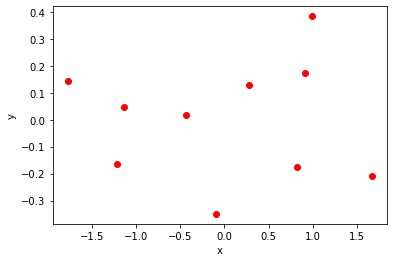

In [110]:
 plt.scatter(X_reduced[:][0],X_reduced[:][1], color = "r")
# plt.scatter(X_reduced, color = "r")
plt.xlabel('x')
plt.ylabel('y')
plt.show()